<a href="https://colab.research.google.com/github/PaoDeVi/T-picos-IA/blob/main/Proyecto_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, utils, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
images = {}
metaData = []

# Directorio del dataset
base_dir = '/content/drive/MyDrive/Tópicos IA/CNN DATASET/Dataset'

folders = next(os.walk(base_dir))[1]

for folder in folders:
    #print(folder)
    csv_path = os.path.join(base_dir, folder, f"{folder}_loc.csv")
    csvFile = pd.read_csv(csv_path)
    metaData.append(np.array(csvFile))

    img_pattern = os.path.join(base_dir, folder, "*.jpg")
    for img in glob.glob(img_pattern):
        n = mpimg.imread(img)
        picName = folder +'/'+ os.path.basename(img)
        print(picName)
        images[picName] = n

user_7/C6.jpg
user_7/B7.jpg
user_7/H1.jpg
user_7/W2.jpg
user_7/S4.jpg
user_7/R9.jpg
user_7/W5.jpg
user_7/U9.jpg
user_7/M0.jpg
user_7/G5.jpg
user_7/R1.jpg
user_7/T4.jpg
user_7/E3.jpg
user_7/L3.jpg
user_7/S0.jpg
user_7/P5.jpg
user_7/I6.jpg
user_7/Y3.jpg
user_7/Y7.jpg
user_7/B0.jpg
user_7/O9.jpg
user_7/E0.jpg
user_7/L7.jpg
user_7/V5.jpg
user_7/O2.jpg
user_7/O0.jpg
user_7/O5.jpg
user_7/T0.jpg
user_7/B6.jpg
user_7/H4.jpg
user_7/X7.jpg
user_7/L5.jpg
user_7/S7.jpg
user_7/T7.jpg
user_7/Y6.jpg
user_7/M4.jpg
user_7/K5.jpg
user_7/X3.jpg
user_7/R7.jpg
user_7/B8.jpg
user_7/M5.jpg
user_7/U2.jpg
user_7/T3.jpg
user_7/D6.jpg
user_7/P1.jpg
user_7/W8.jpg
user_7/M1.jpg
user_7/X8.jpg
user_7/B2.jpg
user_7/R0.jpg
user_7/W3.jpg
user_7/Y0.jpg
user_7/O1.jpg
user_7/O3.jpg
user_7/I8.jpg
user_7/V2.jpg
user_7/Y4.jpg
user_7/K7.jpg
user_7/P0.jpg
user_7/F6.jpg
user_7/Y9.jpg
user_7/O4.jpg
user_7/K8.jpg
user_7/N6.jpg
user_7/V1.jpg
user_7/F8.jpg
user_7/V8.jpg
user_7/G4.jpg
user_7/E9.jpg
user_7/Y8.jpg
user_7/V7.jpg
user_7

In [ ]:
def preprocess(image,box):
    return cv2.resize(image[box[0]:box[1],box[2]:box[3]], (90,90))


In [ ]:
imagesAfterCrop = {}
for userImages in metaData:
    for img in userImages:
        img_name = img[0]
        box = [img[2], img[4], img[1], img[3]]
        if img_name in images:  # Verificar si la imagen existe en el diccionario
            imagesAfterCrop[img_name] = preprocess(images[img_name], box)
        else:
            print(f"Imagen {img_name} no encontrada en el diccionario images")

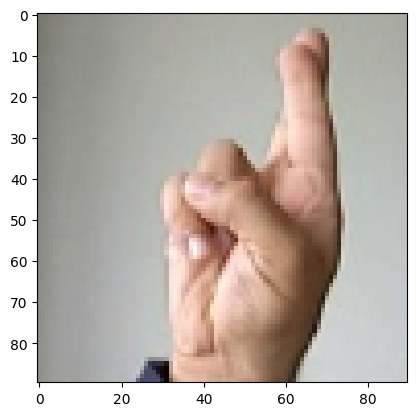

(90, 90, 3)

In [ ]:
img=imagesAfterCrop["user_10/R1.jpg"]
imgplot = plt.imshow(img)
plt.show()
imagesAfterCrop["user_10/R1.jpg"].shape

In [ ]:
def decodeReal(yHat):
    return chr(np.argmax(yHat) + 97).upper()

def decodePredict(number):
    return chr(number + 97).upper()

In [ ]:
def createLabels(images):
    counter = 0;
    labels = np.zeros((len(images),26))
    for img in images:
        labels[counter][(ord(img.split('/')[1][0]) - ord('A'))] = 1
        counter = counter + 1
    return labels


y = createLabels(imagesAfterCrop)
print(y.shape)

(1680, 26)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(list(imagesAfterCrop.values()), y, test_size=0.2, random_state = 0)
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
num_classes = 26

inputs = layers.Input(shape=(90, 90, 3))

# Primera capa convolucional
x = layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    strides=2,
    padding='same',
    activation='relu'
)(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)

# Segunda capa convolucional
x = layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    strides=2,
    padding='same',
    activation='relu'
)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)

# Tercera capa convolucional
x = layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    strides=2,
    padding='same',
    activation='relu'
)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)

# Aplanar las características
x = layers.Flatten()(x)

# Capa densa
x = layers.Dense(
    units=1024,
    activation='relu'
)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Capa de salida
outputs = layers.Dense(
    units=num_classes,
    activation='softmax'
)(x)

model = models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 90, 90, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 45, 45, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 45, 45, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 45, 45, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 23, 23, 32)        128       
 chNormalization)                                            

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    x_train, y_train,
    batch_size=16,
    epochs=15,
    validation_split=0.2
    )

Epoch 1/15
68/68 [==============================] - 14s 165ms/step - loss: 4.2504 - accuracy: 0.0791 - val_loss: 3.3206 - val_accuracy: 0.0297
Epoch 2/15
68/68 [==============================] - 9s 133ms/step - loss: 3.0442 - accuracy: 0.2242 - val_loss: 3.2732 - val_accuracy: 0.0558
Epoch 3/15
68/68 [==============================] - 10s 141ms/step - loss: 2.2964 - accuracy: 0.3730 - val_loss: 3.0087 - val_accuracy: 0.1078
Epoch 4/15
68/68 [==============================] - 10s 152ms/step - loss: 1.8326 - accuracy: 0.4707 - val_loss: 2.6539 - val_accuracy: 0.2491
Epoch 5/15
68/68 [==============================] - 8s 122ms/step - loss: 1.4266 - accuracy: 0.5665 - val_loss: 2.1846 - val_accuracy: 0.3643
Epoch 6/15
68/68 [==============================] - 10s 151ms/step - loss: 1.1774 - accuracy: 0.6363 - val_loss: 1.6545 - val_accuracy: 0.5093
Epoch 7/15
68/68 [==============================] - 9s 132ms/step - loss: 1.0624 - accuracy: 0.6698 - val_loss: 1.2777 - val_accuracy: 0.6245
Ep

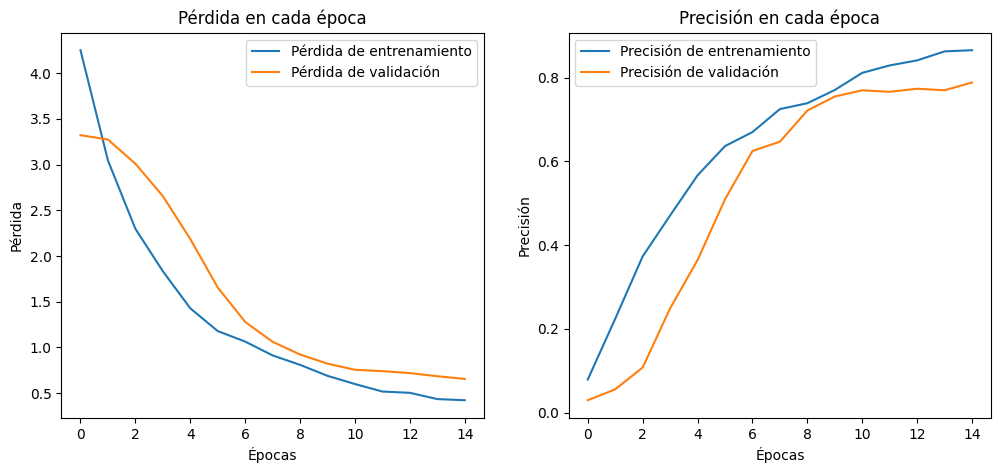

In [ ]:
# Gráfico de pérdida
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history.history['loss'], label='Pérdida de entrenamiento')
ax1.plot(history.history['val_loss'], label='Pérdida de validación')
ax1.set_title('Pérdida en cada época')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Pérdida')
ax1.legend()

# Gráfico de Accuracy
ax2.plot(history.history['accuracy'], label='Precisión de entrenamiento')
ax2.plot(history.history['val_accuracy'], label='Precisión de validación')
ax2.set_title('Precisión en cada época')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Precisión')
ax2.legend()

plt.show()

1/1 [==============================] - 0s 275ms/step
The predicted Letter for Example #1 is F
The real Letter for Example #1 is F
1/1 [==============================] - 0s 24ms/step
The predicted Letter for Example #2 is R
The real Letter for Example #2 is K
1/1 [==============================] - 0s 26ms/step
The predicted Letter for Example #3 is N
The real Letter for Example #3 is M
1/1 [==============================] - 0s 27ms/step
The predicted Letter for Example #4 is K
The real Letter for Example #4 is K
1/1 [==============================] - 0s 30ms/step
The predicted Letter for Example #5 is D
The real Letter for Example #5 is D
1/1 [==============================] - 0s 24ms/step
The predicted Letter for Example #6 is U
The real Letter for Example #6 is U
1/1 [==============================] - 0s 28ms/step
The predicted Letter for Example #7 is V
The real Letter for Example #7 is V
1/1 [==============================] - 0s 33ms/step
The predicted Letter for Example #8 is G
The

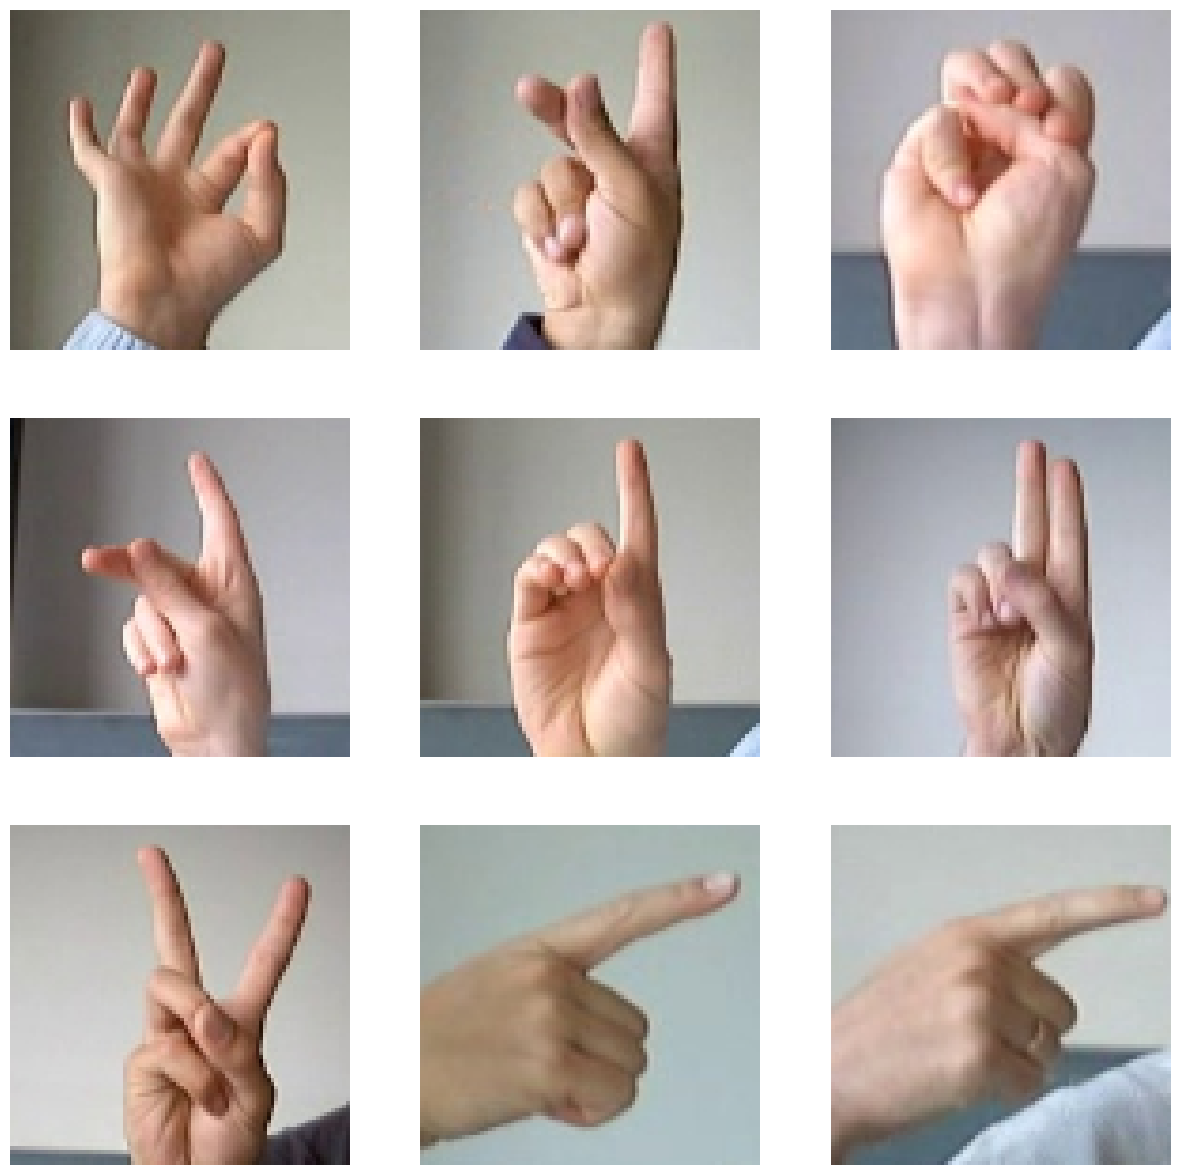

In [ ]:
fig = plt.figure(figsize=(15, 15))
columns = 3
rows = 3

for i in range(1, columns*rows + 1):
    img_index = i - 1
    img = x_test[img_index]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis('off')

    prediction = model.predict(np.array([x_test[img_index]]))
    predicted_letter = decodePredict(np.argmax(prediction))
    real_letter = decodeReal(y_test[img_index])

    print(f"The predicted Letter for Example #{i} is {predicted_letter}")
    print(f"The real Letter for Example #{i} is {real_letter}")

plt.show()

In [ ]:
# Inicializar arrays para el conteo de letras y errores
letras = np.zeros(26)
errores = np.zeros(26)

for i, example in enumerate(x_test):
    yhat = np.argmax(y_test[i])
    letras[yhat] += 1
    prediction = np.argmax(model.predict(np.array([example])))
    if prediction != yhat:
        errores[yhat] += 1


letras[letras == 0] = -1

mistakesPerLetter = errores / letras

lettersArray = np.array([chr(i) for i in range(97, 123)])

df = pd.DataFrame({'letters': lettersArray, 'mistakes': mistakesPerLetter})
df['colors'] = 'b'
df.loc[df.mistakes > 0.15, 'colors'] = 'r'
print(df)

1/1 [==============================] - 0s 25ms/step
   letters  mistakes colors
0        a  0.133333      b
1        b  0.000000      b
2        c  0.105263      b
3        d  0.375000      r
4        e  0.000000      b
5        f  0.117647      b
6        g  0.000000      b
7        h  0.266667      r
8        i  0.111111      b
9        j -0.000000      b
10       k  0.312500      r
11       l  0.176471      r
12       m  0.416667      r
13       n  0.625000      r
14       o  0.000000      b
15       p  0.000000      b
16       q  0.312500      r
17       r  0.615385      r
18       s  0.666667      r
19       t  0.181818      r
20       u  0.384615      r
21       v  0.769231      r
22       w  0.625000      r
23       x  0.142857      b
24       y  0.200000      r
25       z -0.000000      b


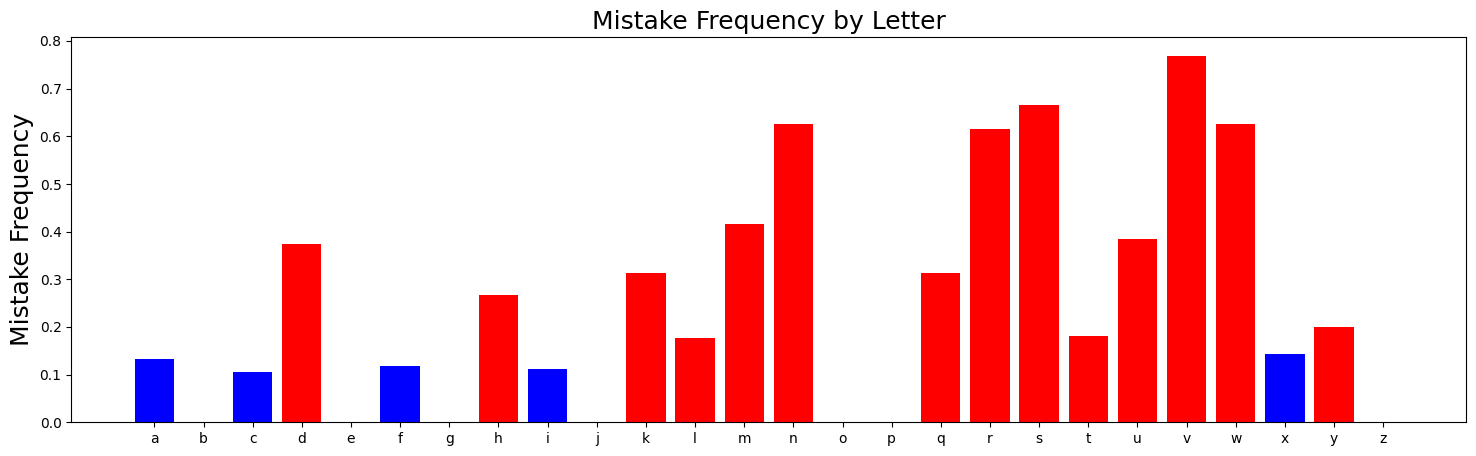

In [ ]:
f, ax = plt.subplots(figsize=(18, 5))
plt.bar(df.letters, df.mistakes, color=df.colors)
ax.set_title('Mistake Frequency by Letter', fontsize=18)
ax.set_ylabel('Mistake Frequency', fontsize=18)
plt.show()

### MEJORAR EL MODELO

In [ ]:
num_classes = 26

# Definir la entrada del modelo
inputs = layers.Input(shape=(90, 90, 3))

# Primera capa convolucional
x = layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    strides=2,
    padding='same',
    activation='relu'
)(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)

# Segunda capa convolucional
x = layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    strides=2,
    padding='same',
    activation='relu'
)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)

# Tercera capa convolucional (añadir más filtros)
x = layers.Conv2D(
    filters=64,
    kernel_size=(3, 3),
    strides=2,
    padding='same',
    activation='relu'
)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)

# Aplanar las características
x = layers.Flatten()(x)

# Capa densa (reducir neuronas)
x = layers.Dense(
    units=512,
    activation='relu'
)(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Capa de salida
outputs = layers.Dense(
    units=num_classes,
    activation='softmax'
)(x)

model = models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 90, 90, 3)]       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 45, 45, 32)        896       
                                                                 
 batch_normalization_40 (Ba  (None, 45, 45, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_40 (Dropout)        (None, 45, 45, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 23, 23, 32)        9248      
                                                                 
 batch_normalization_41 (Ba  (None, 23, 23, 32)        128       
 tchNormalization)                                         

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    x_train, y_train,
    batch_size=16,
    epochs=30,
    validation_split=0.2
    )

Epoch 1/30
68/68 [==============================] - 13s 160ms/step - loss: 4.0759 - accuracy: 0.0949 - val_loss: 3.2867 - val_accuracy: 0.0335
Epoch 2/30
68/68 [==============================] - 10s 141ms/step - loss: 2.8048 - accuracy: 0.2651 - val_loss: 3.3676 - val_accuracy: 0.0446
Epoch 3/30
68/68 [==============================] - 13s 189ms/step - loss: 2.0393 - accuracy: 0.3926 - val_loss: 3.3790 - val_accuracy: 0.0967
Epoch 4/30
68/68 [==============================] - 11s 165ms/step - loss: 1.5633 - accuracy: 0.5358 - val_loss: 3.2148 - val_accuracy: 0.1524
Epoch 5/30
68/68 [==============================] - 11s 157ms/step - loss: 1.2806 - accuracy: 0.6056 - val_loss: 2.8181 - val_accuracy: 0.1970
Epoch 6/30
68/68 [==============================] - 10s 143ms/step - loss: 1.0534 - accuracy: 0.6586 - val_loss: 2.1599 - val_accuracy: 0.3903
Epoch 7/30
68/68 [==============================] - 11s 159ms/step - loss: 0.8737 - accuracy: 0.7284 - val_loss: 1.5836 - val_accuracy: 0.5242

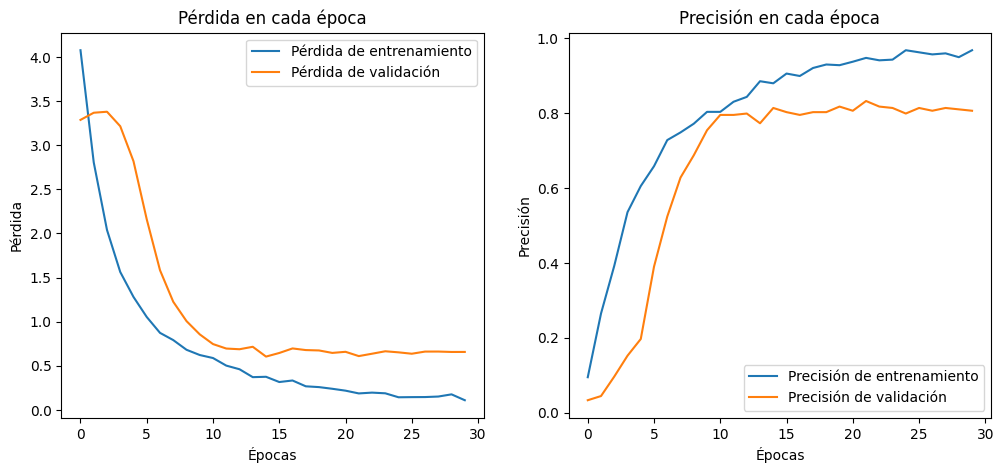

In [ ]:
# Gráfico de pérdida
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history.history['loss'], label='Pérdida de entrenamiento')
ax1.plot(history.history['val_loss'], label='Pérdida de validación')
ax1.set_title('Pérdida en cada época')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Pérdida')
ax1.legend()

# Gráfico de Accuracy
ax2.plot(history.history['accuracy'], label='Precisión de entrenamiento')
ax2.plot(history.history['val_accuracy'], label='Precisión de validación')
ax2.set_title('Precisión en cada época')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Precisión')
ax2.legend()

plt.show()

1/1 [==============================] - 0s 25ms/step
The predicted Letter for Example #1 is F
The real Letter for Example #1 is F
1/1 [==============================] - 0s 25ms/step
The predicted Letter for Example #2 is R
The real Letter for Example #2 is K
1/1 [==============================] - 0s 32ms/step
The predicted Letter for Example #3 is M
The real Letter for Example #3 is M
1/1 [==============================] - 0s 38ms/step
The predicted Letter for Example #4 is K
The real Letter for Example #4 is K
1/1 [==============================] - 0s 25ms/step
The predicted Letter for Example #5 is D
The real Letter for Example #5 is D
1/1 [==============================] - 0s 37ms/step
The predicted Letter for Example #6 is U
The real Letter for Example #6 is U
1/1 [==============================] - 0s 31ms/step
The predicted Letter for Example #7 is V
The real Letter for Example #7 is V
1/1 [==============================] - 0s 30ms/step
The predicted Letter for Example #8 is G
The 

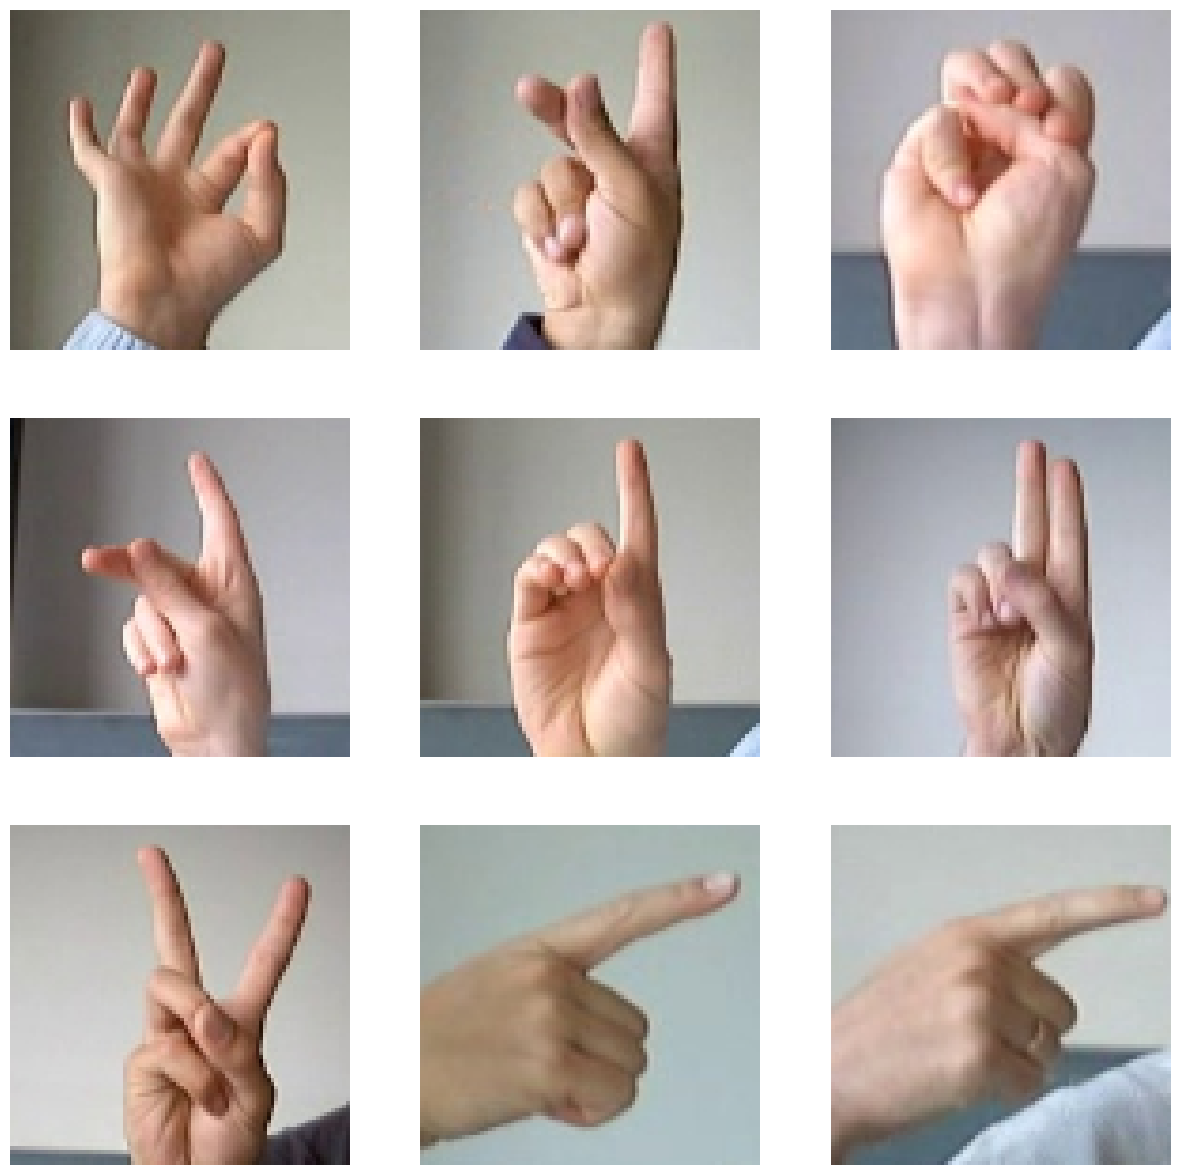

In [ ]:
fig = plt.figure(figsize=(15, 15))
columns = 3
rows = 3

for i in range(1, columns*rows + 1):
    img_index = i - 1
    img = x_test[img_index]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis('off')

    prediction = model.predict(np.array([x_test[img_index]]))
    predicted_letter = decodePredict(np.argmax(prediction))
    real_letter = decodeReal(y_test[img_index])

    print(f"The predicted Letter for Example #{i} is {predicted_letter}")
    print(f"The real Letter for Example #{i} is {real_letter}")

plt.show()

In [ ]:
# Inicializar arrays para el conteo de letras y errores
letras = np.zeros(26)
errores = np.zeros(26)

for i, example in enumerate(x_test):
    yhat = np.argmax(y_test[i])
    letras[yhat] += 1
    prediction = np.argmax(model.predict(np.array([example])))
    if prediction != yhat:
        errores[yhat] += 1


letras[letras == 0] = -1

mistakesPerLetter = errores / letras

lettersArray = np.array([chr(i) for i in range(97, 123)])

df = pd.DataFrame({'letters': lettersArray, 'mistakes': mistakesPerLetter})
df['colors'] = 'b'
df.loc[df.mistakes > 0.15, 'colors'] = 'r'
print(df)

1/1 [==============================] - 0s 39ms/step
   letters  mistakes colors
0        a  0.133333      b
1        b  0.000000      b
2        c  0.105263      b
3        d  0.375000      r
4        e  0.000000      b
5        f  0.058824      b
6        g  0.153846      b
7        h  0.133333      b
8        i  0.055556      b
9        j -0.000000      b
10       k  0.062500      b
11       l  0.058824      b
12       m  0.250000      r
13       n  0.750000      r
14       o  0.090909      b
15       p  0.000000      b
16       q  0.125000      b
17       r  0.307692      r
18       s  0.333333      r
19       t  0.090909      b
20       u  0.461538      r
21       v  0.461538      r
22       w  0.750000      r
23       x  0.142857      b
24       y  0.300000      r
25       z -0.000000      b


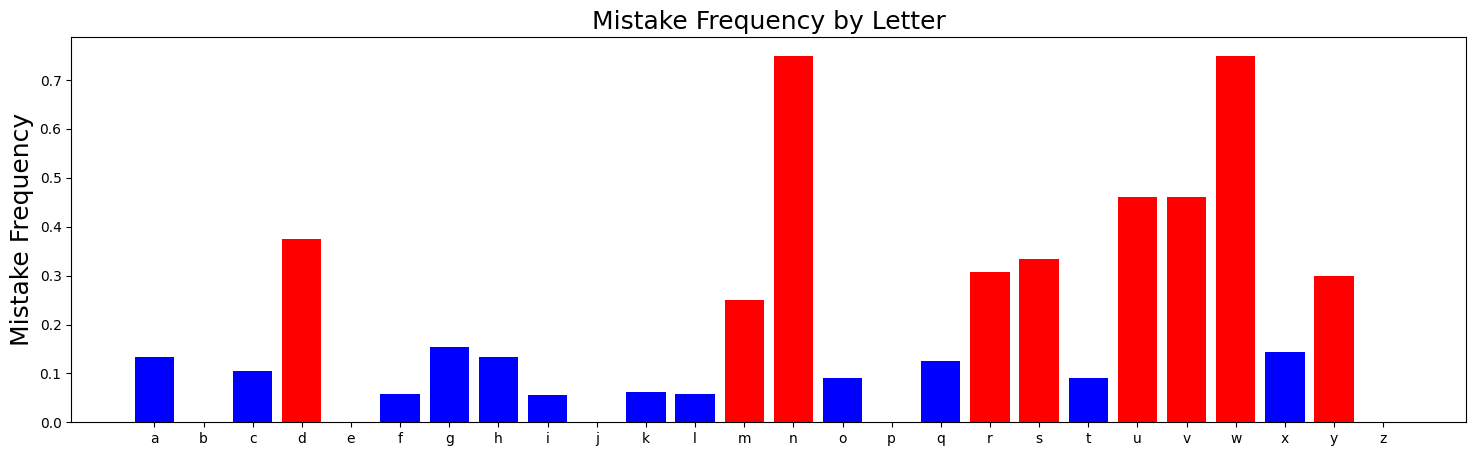

In [ ]:
f, ax = plt.subplots(figsize=(18, 5))
plt.bar(df.letters, df.mistakes, color=df.colors)
ax.set_title('Mistake Frequency by Letter', fontsize=18)
ax.set_ylabel('Mistake Frequency', fontsize=18)
plt.show()